# Supervised Learning: Support Vector Machines

## kernel trick: 3D: illustration

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

### example: decide whether a fruit is good to eat - based ONLY on the COLOUR.

There are **five** kinds of fruit.
1. Green fruit is an unripe peach, not good to eat.
2. Yellow fruit is an ripe peach, good to eat.
3. Orange fruit is an unripe plum, not good to eat.
4. Purple fruit is a ripe plum, good to eat.
5. Black fruit is a rotten peach, not good to eat.

In [2]:
n_points = 5
scale = .1
x_green = np.random.normal(loc=-2., scale=scale, size=n_points) 
y_green = np.zeros(n_points)
z_green = np.zeros(n_points)
x_yellow = np.random.normal(loc=-1.4, scale=scale, size=n_points) 
y_yellow = np.zeros(n_points)
z_yellow = np.zeros(n_points)
x_orange = np.random.normal(loc=0., scale=scale, size=n_points) 
y_orange = np.zeros(n_points)
z_orange = np.zeros(n_points)
x_purple = np.random.normal(loc=1.4, scale=scale, size=n_points) 
y_purple = np.zeros(n_points)
z_purple = np.zeros(n_points)
x_black = np.random.normal(loc=2., scale=scale, size=n_points) 
y_black = np.zeros(n_points)
z_black = np.zeros(n_points)

<IPython.core.display.Javascript object>


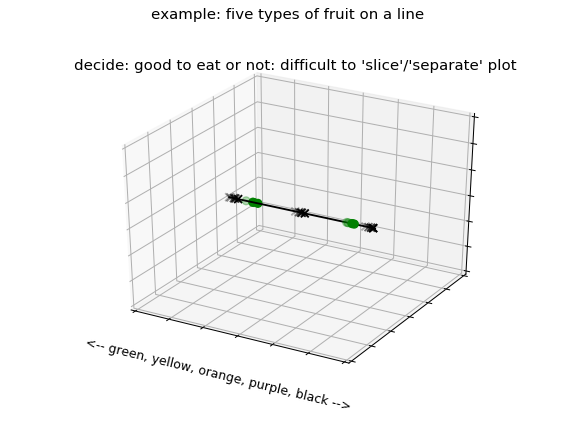

(-3.0, 3.0)

In [3]:
fig = plt.figure(7)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("example: five types of fruit on a line")
plt.title("decide: good to eat or not: difficult to 'slice'/'separate' plot")

x_line = np.arange(-2.1, 2.1, .01)
y_line = np.zeros(x_line.size)
z_line = np.zeros(x_line.size)
ax.plot(x_line, y_line, zs=z_line, color='black')
markersize = 40.
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-3., 3.])

<IPython.core.display.Javascript object>


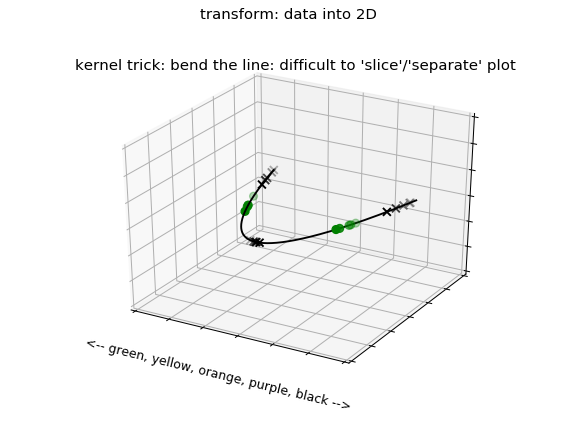

(-3.0, 3.0)

In [4]:
shift = 2.2
y_green = x_green**2  - shift
y_yellow = x_yellow**2 - shift
y_orange = x_orange**2 - shift
y_purple = x_purple**2 - shift
y_black = x_black**2 - shift

fig = plt.figure(8)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("transform: data into 2D")
plt.title("kernel trick: bend the line: difficult to 'slice'/'separate' plot")

y_line = x_line**2 - shift
ax.plot(x_line, y_line, zs=z_line, color='black')
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-3., 3.])

<IPython.core.display.Javascript object>


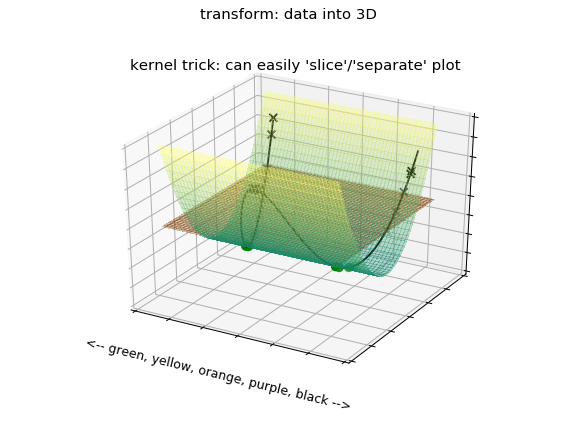

In [5]:
z_green = y_green**2  - shift
z_yellow = y_yellow**2 - shift
z_orange = y_orange**2 - shift
z_purple = y_purple**2 - shift
z_black = y_black**2 - shift

fig = plt.figure(9)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("transform: data into 3D")
plt.title("kernel trick: can easily 'slice'/'separate' plot")

z_line = y_line**2 - shift
ax.plot(x_line, y_line, zs=z_line, color='black')
ax.scatter(
    x_green, y_green, zs=z_green,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_yellow, y_yellow, zs=z_yellow,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_orange, y_orange, zs=z_orange,
    c='black',
    marker='x',
    s=markersize,
)
ax.scatter(
    x_purple, y_purple, zs=z_purple,
    c='green',
    marker='o',
    s=markersize,
)
ax.scatter(
    x_black, y_black, zs=z_black,
    c='black',
    marker='x',
    s=markersize,
)

In [6]:
show_surface = True # Optionally
if show_surface:
    x = np.arange(-2.5, 2.5, 0.05)
    y = np.arange(-2.5, 2.5, 0.05)
    x, y = np.meshgrid(x, y)
    
    # quadratic surface
    dual_quad = y**2 - shift
        
    ax.plot_surface(
        x, y, dual_quad,
        cmap=cm.summer,
        alpha=.3,
        linewidth=0,
        antialiased=False,
    )

In [7]:
show_discriminator = True # Optionally
if show_discriminator:
    
    # "good" planar discriminator
    plane = 0. * x
    
    ax.plot_surface(
        x, y, plane,
        alpha=.3,
        linewidth=0,
        antialiased=False,
    )

ax.set_xlabel('<-- green, yellow, orange, purple, black -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-3., 3., -3., 3.])
ax.set_zlim([-4., 4.])

(-4.0, 4.0)

* Choice of projection $\phi$ ?

    * VIA: kernel transformation:
        * compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results
    * PROBLEM: projecting N points into N dimensions => computationally intensive as N grows large
    * SOLUTION: kernel trick => fit on kernel-transformed data can be done implicitly (do NOT build the full N-dimensional representation of the kernel projection)

ref: youtube.com/watch?v=-Z4aojJ-pdg